# Classification Challenge

Wine experts can identify wines from specific vineyards through smell and taste, but the factors that give different wines their individual charateristics are actually based on their chemical composition.

In this challenge, you must train a classification model to analyze the chemical and visual features of wine samples and classify them based on their cultivar (grape variety).

> **Citation**: The data used in this exercise was originally collected by Forina, M. et al.
>
> PARVUS - An Extendible Package for Data Exploration, Classification and Correlation.
Institute of Pharmaceutical and Food Analysis and Technologies, Via Brigata Salerno,
16147 Genoa, Italy.
>
> It can be downloaded from the UCI dataset repository (Dua, D. and Graff, C. (2019). [UCI Machine Learning Repository]([http://archive.ics.uci.edu/ml). Irvine, CA: University of California, School of Information and Computer Science). 

## Explore the data

Run the following cell to load a CSV file of wine data, which consists of 12 numeric features and a classification label with the following classes:

- **0** (*variety A*)
- **1** (*variety B*)
- **2** (*variety C*)

In [2]:
import pandas as pd

# load the training dataset
data = pd.read_csv('C:\\Users\\adams\\OneDrive\\Documents\\Git\\ml-notebooks\\wine.csv')
data.sample(10)

,Alcohol,Malic_acid,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color_intensity,Hue,OD280_315_of_diluted_wines,Proline,WineVariety
142,13.52,3.17,2.72,23.5,97,1.55,0.52,0.50,0.55,4.350000,0.89,2.06,520,2
11,14.12,1.48,2.32,16.8,95,2.20,2.43,0.26,1.57,5.000000,1.17,2.82,1280,0
138,13.49,3.59,2.19,19.5,88,1.62,0.48,0.58,0.88,5.700000,0.81,1.82,580,2
30,13.73,1.50,2.70,22.5,101,3.00,3.25,0.29,2.38,5.700000,1.19,2.71,1285,0
51,13.83,1.65,2.60,17.2,94,2.45,2.99,0.22,2.29,5.600000,1.24,3.37,1265,0
82,12.08,1.13,2.51,24.0,78,2.00,1.58,0.40,1.40,2.200000,1.31,2.72,630,1
141,13.36,2.56,2.35,20.0,89,1.40,0.50,0.37,0.64,5.600000,0.70,2.47,780,2
48,14.10,2.02,2.40,18.8,103,2.75,2.92,0.32,2.38,6.200000,1.07,2.75,1060,0
118,12.77,3.43,1.98,16.0,80,1.63,1.25,0.43,0.83,3.400000,0.70,2.12,372,1
171,12.77,2.39,2.28,19.5,86,1.39,0.51,0.48,0.64,9.899999,0.57,1.63,470,2


Your challenge is to explore the data and train a classification model that achieves an overall *Recall* metric of over 0.95 (95%).

> **Note**: There is no single "correct" solution. A sample solution is provided in [03 - Wine Classification Solution.ipynb](03%20-%20Wine%20Classification%20Solution.ipynb).

## Train and evaluate a model

### Split features and label

In [11]:
# Split features and labels
features = ['Alcohol','Malic_acid','Ash','Alcalinity','Magnesium','Phenols','Flavanoids','Nonflavanoids','Proanthocyanins','Color_intensity','Hue','OD280_315_of_diluted_wines','Proline']
label = 'WineVariety'
X, y = data[features].values, data[label].values

for n in range(0,4):
    print("Wine", str(n+1), "\n  Features:",list(X[n]), "\n  Label:", y[n])

Wine 1 
  Features: [14.23, 1.71, 2.43, 15.6, 127.0, 2.8, 3.06, 0.28, 2.29, 5.64, 1.04, 3.92, 1065.0] 
  Label: 0
Wine 2 
  Features: [13.2, 1.78, 2.14, 11.2, 100.0, 2.65, 2.76, 0.26, 1.28, 4.38, 1.05, 3.4, 1050.0] 
  Label: 0
Wine 3 
  Features: [13.16, 2.36, 2.67, 18.6, 101.0, 2.8, 3.24, 0.3, 2.81, 5.68, 1.03, 3.17, 1185.0] 
  Label: 0
Wine 4 
  Features: [14.37, 1.95, 2.5, 16.8, 113.0, 3.85, 3.49, 0.24, 2.18, 7.8, 0.86, 3.45, 1480.0] 
  Label: 0


### Compare feature distributions

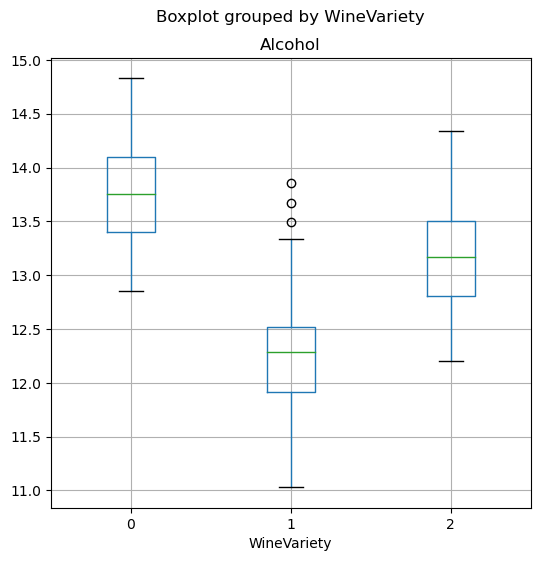

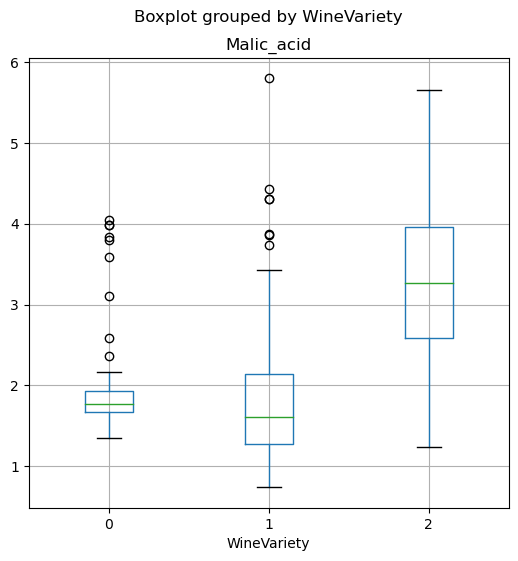

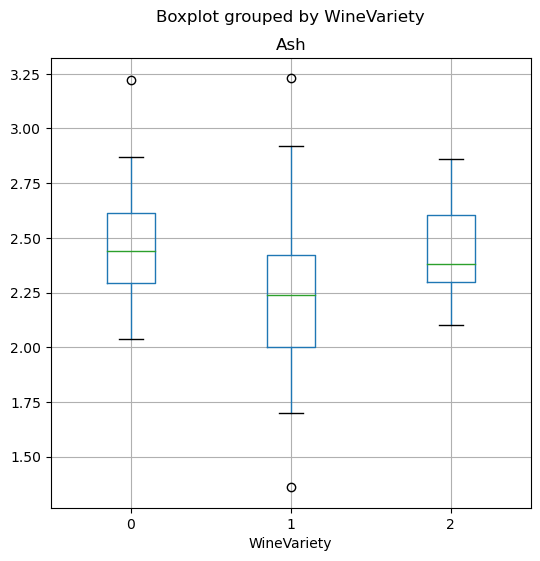

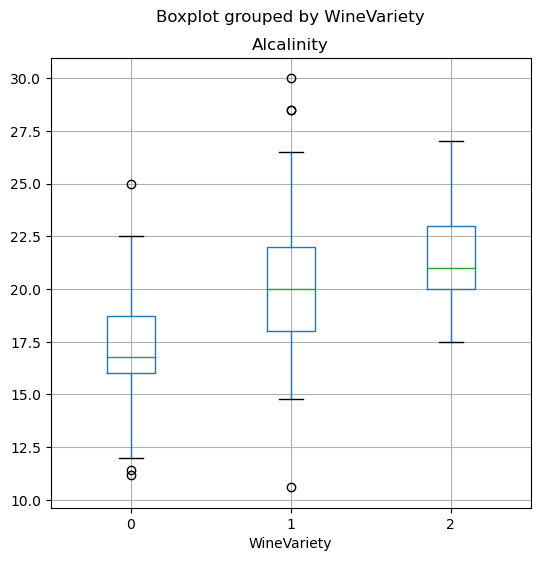

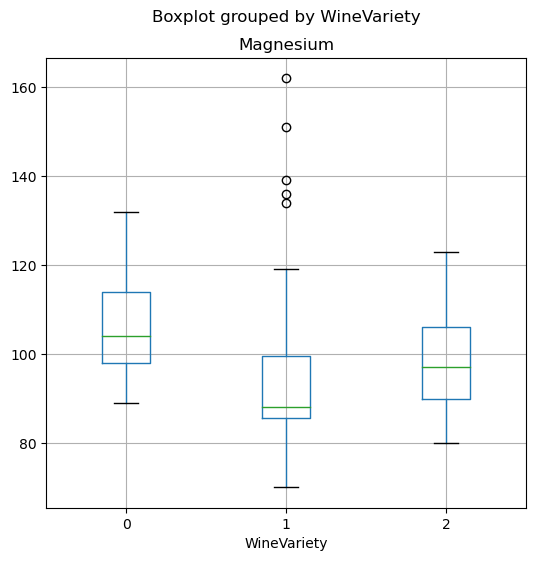

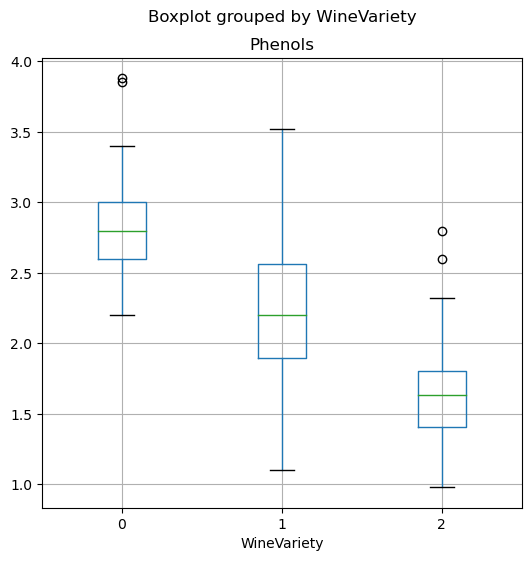

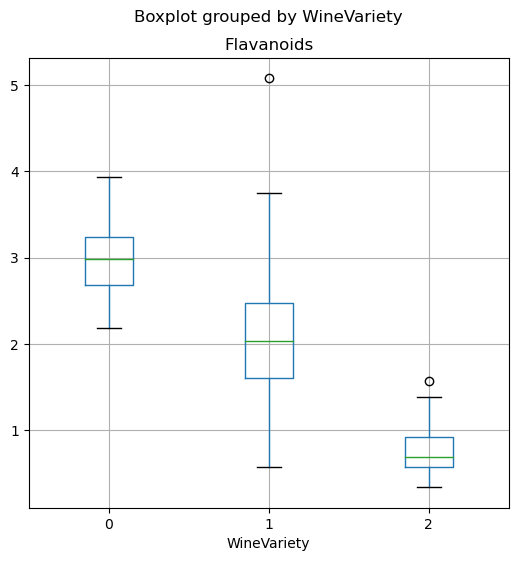

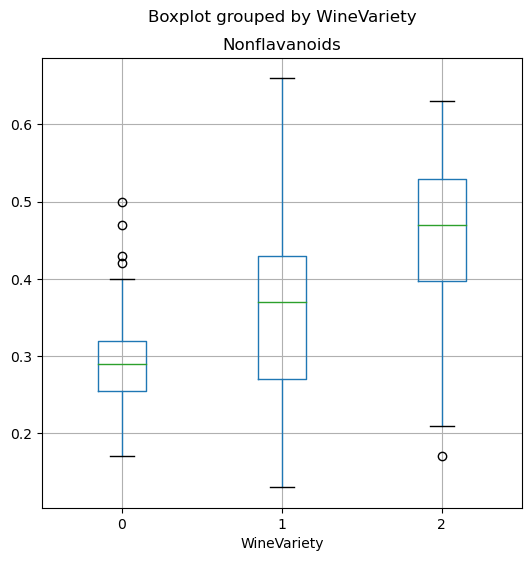

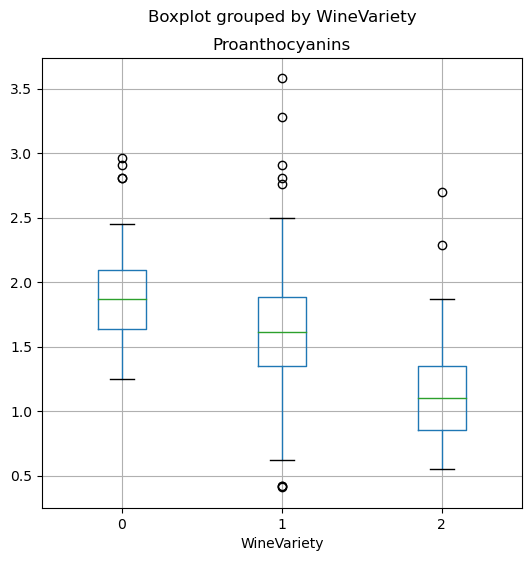

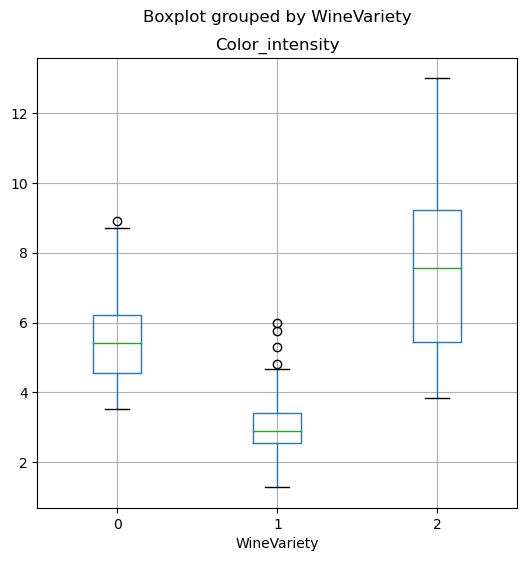

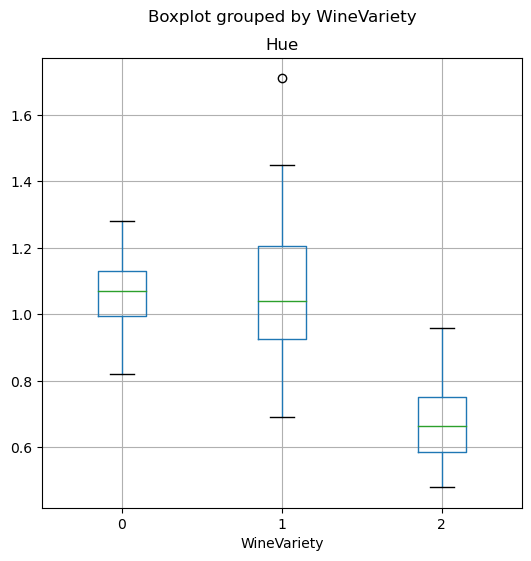

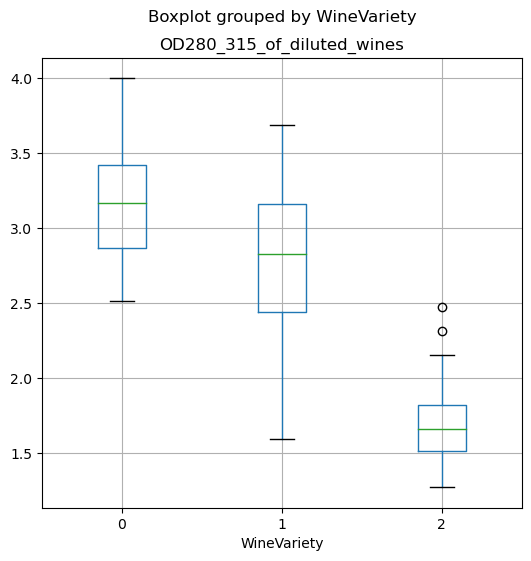

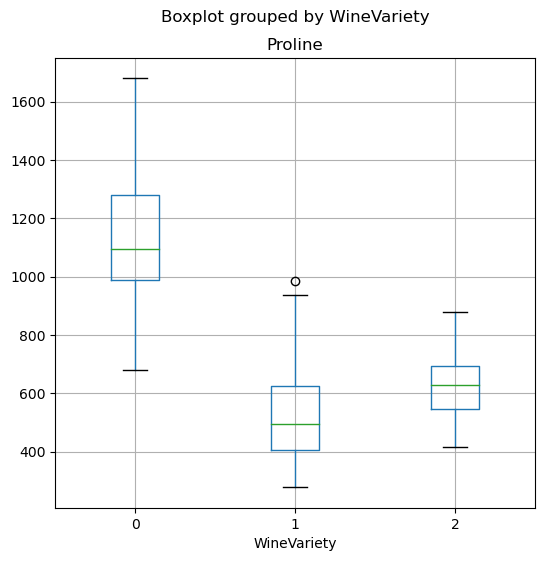

In [12]:
from matplotlib import pyplot as plt
%matplotlib inline

for col in features:
    data.boxplot(column=col, by=label, figsize=(6,6)) #call on dataframe to harness "by"
    plt.title(col)
plt.show()

### Split in to training and test

In [39]:
from sklearn.model_selection import train_test_split

# separate in to X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=55555)

# print quantities
print(f'Train count: {X_train.shape[0]} \nTest count: {X_test.shape[0]}') 

Train count: 124 
Test count: 54


### Normalise features and train model

In [40]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression

# Define preprocessing for numeric columns (scale them)
numeric_features = [0,1,2,3,4,5,6]
feature_transformer = Pipeline(steps= [
    ("scaler", StandardScaler())
    ])

# Create preprocessing steps
preprocessor = ColumnTransformer(transformers=[
    ("preprocess", feature_transformer, numeric_features)
    ])


# Create training pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', LogisticRegression(solver='lbfgs', multi_class='auto'))])


# fit the pipeline to train a linear regression model on the training set
model = pipeline.fit(X_train, y_train)
print (model)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('preprocess',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [0, 1, 2, 3, 4, 5, 6])])),
                ('regressor', LogisticRegression())])


### Evaluate Model: accuracy, precision, recall & confusion matrix

Overall Accuracy: 0.9444444444444444
Overall Precision: 0.9481481481481482
Overall Recall: 0.9453044375644994


Text(0, 0.5, 'Actual Variety')

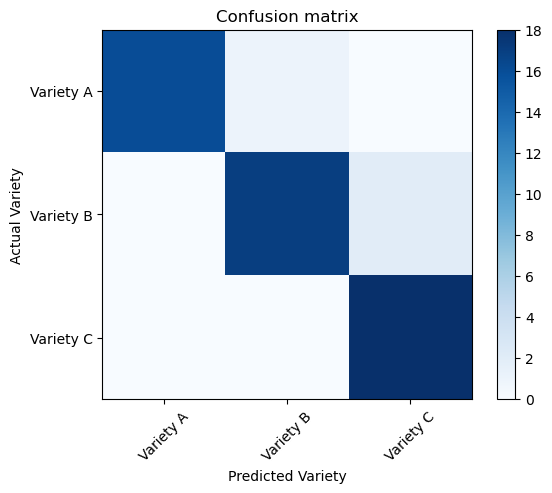

In [41]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import numpy as np
# get prediction from data
predictions = model.predict(X_test)

# Get metrics
print("Overall Accuracy:", accuracy_score(y_test, predictions))
print("Overall Precision:", precision_score(y_test, predictions, average="macro"))
print("Overall Recall:", recall_score(y_test, predictions, average="macro"))

# Plot confusion matrix
cm = confusion_matrix(y_test, predictions)
classes = ['Variety A','Variety B','Variety C']
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
plt.title("Confusion matrix")
plt.xlabel("Predicted Variety")
plt.ylabel("Actual Variety")

### Evaluate Model: ROC and AUC

Average AUC: 0.9944599152201491


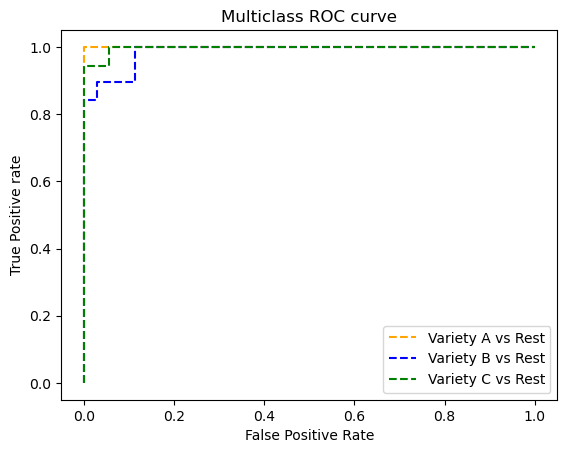

In [44]:
from sklearn.metrics import roc_curve, roc_auc_score

# Get class probability scores
probabilities = model.predict_proba(X_test)

auc = roc_auc_score(y_test, probabilities, multi_class="ovr")
print("Average AUC:", auc)

# get ROC metrics for each class
fpr = {}
tpr = {}
thresh = {}
for i in range(len(classes)):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, probabilities[:,i], pos_label=i)

   
# Plot the ROC chart
plt.plot(fpr[0], tpr[0], linestyle="--", color="orange", label=classes[0] + ' vs Rest')
plt.plot(fpr[1], tpr[1], linestyle="--", color="blue", label=classes[1] + ' vs Rest')
plt.plot(fpr[2], tpr[2], linestyle="--", color="green", label=classes[2] + ' vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc="best")


## Use the model with new data observation

When you're happy with your model's predictive performance, save it and then use it to predict classes for the following two new wine samples:

- \[13.72,1.43,2.5,16.7,108,3.4,3.67,0.19,2.04,6.8,0.89,2.87,1285\]
- \[12.37,0.94,1.36,10.6,88,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520\]


In [52]:
import joblib

# Save the model as a pickle file
filename = 'C:\\Users\\adams\\OneDrive\\Documents\\Git\\ml-notebooks\\wine_classifer.pkl'
joblib.dump(model, filename)

# load the saved model
model = joblib.load(filename)

# define new data
X_new = np.array([[13.72,1.43,2.5,16.7,108,3.4,3.67,0.19,2.04,6.8,0.89,2.87,1285],
                  [12.37,0.94,1.36,10.6,88,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520]])

# Get new label predictions
new_predictions = model.predict(X_new)

# Get the predicted classes.
for i in range(len(new_predictions)):
    print(new_predictions[i], '(' + classes[new_predictions[i]] +')')

0 (Variety A)
1 (Variety B)
